# PlutoTV - Xbox and Comcast - Paid Media Effectiveness - MAU
ARMA, ARIMA, SARIMA reference: https://builtin.com/data-science/time-series-forecasting-python

In [1]:
import spline
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [114]:
df = pd.read_csv("C:\\Users\\uremekn\\Documents\\Analyses\\BIS 4559 - UA Xbox Comcast - Paid Media Effectiveness\\MAU\\xbox_comcast_dau_20210101_20230531.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Xbox Forecasting
### Campaign Flight: 12/5/22 - 12/31/22

In [166]:
# data prep
xbox = df[df['Device'] == 'XBOXONE'].sort_values(by=['Date'], ascending=True)
xbox = xbox[(xbox['Date'] < '2023-01-01')]
xbox.index = pd.to_datetime(xbox['Date'], format='%Y-%m-%d')
del xbox['Date']
del xbox['Device']

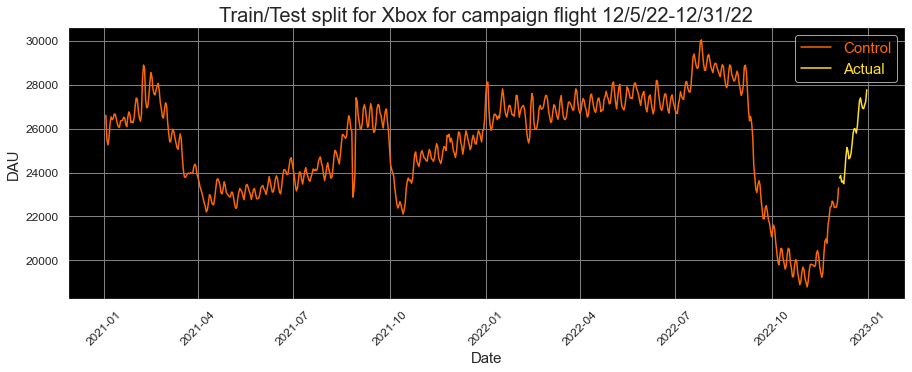

In [167]:
xbox['mov_avg'] = xbox['Users'].rolling(3).mean()

xbox_train =xbox[xbox.index < pd.to_datetime("2022-12-05", format='%Y-%m-%d')]
xbox_test = xbox[xbox.index >= pd.to_datetime("2022-12-05", format='%Y-%m-%d')]

plt.subplots(figsize=(15,5))
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'gray'
plt.plot(xbox_train.index, xbox_train['mov_avg'], color = "#ff6700", label = 'Control')
plt.plot(xbox_test.index, xbox_test['mov_avg'], color = "#ffde2b", label = 'Actual')
plt.ylabel('DAU', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Train/Test split for Xbox for campaign flight 12/5/22-12/31/22", fontsize = 20)
plt.legend(fontsize=15, labelcolor='linecolor')

C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


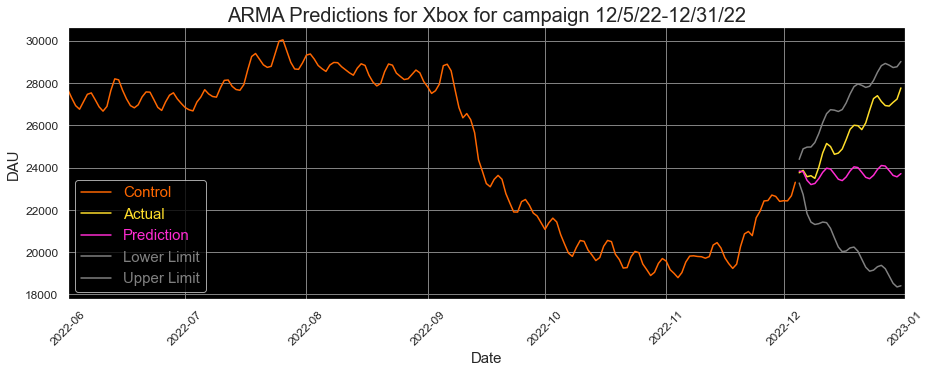

In [171]:
# Autoregressive Moving Average (ARMA)
xbox_ARMAmodel = SARIMAX(xbox_train['mov_avg'], order = (2, 2, 9))
xbox_ARMAmodel = xbox_ARMAmodel.fit(smoothing_level=.2, smoothing_slope=.3)

xbox_arma_y_pred = xbox_ARMAmodel.get_forecast(steps=27) # test data has 27 datapoints
xbox_arma_y_pred_df = xbox_arma_y_pred.conf_int(alpha = 0.05) 
xbox_arma_y_pred_df["Predictions"] = xbox_ARMAmodel.predict(start = xbox_arma_y_pred_df.index[0], end = xbox_arma_y_pred_df.index[-1])

plt.subplots(figsize=(15,5))
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'gray'
plt.ylabel('DAU', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.plot(xbox_train.index, xbox_train['mov_avg'], color = "#ff6700", label = 'Control')
plt.plot(xbox_test.index, xbox_test['mov_avg'], color = "#ffde2b", label = 'Actual')
plt.plot(xbox_arma_y_pred_df["Predictions"], color='#ff2cd2', label = 'Prediction')
plt.plot(xbox_arma_y_pred_df["lower mov_avg"], color='gray', label = 'Lower Limit')
plt.plot(xbox_arma_y_pred_df["upper mov_avg"], color='gray', label = 'Upper Limit')

plt.title("ARMA Predictions for Xbox for campaign 12/5/22-12/31/22", fontsize = 20)
plt.xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2023-01-01'))
plt.legend(fontsize=15, labelcolor='linecolor')

In [170]:
xbox_arma_y_pred_df.to_csv('C:\\Users\\uremekn\\Documents\\Analyses\\BIS 4559 - UA Xbox Comcast - Paid Media Effectiveness\\MAU\\xbox_dau_pred_20221205_20221231.csv')

# Xbox Forecasting
### Campaign Flight: 1/16/23 - 2/28/23

In [207]:
# data prep
xbox = df[df['Device'] == 'XBOXONE'].sort_values(by=['Date'], ascending=True)
xbox = xbox[(xbox['Date'] < '2023-03-01')]
xbox.index = pd.to_datetime(xbox['Date'], format='%Y-%m-%d')
del xbox['Date']
del xbox['Device']

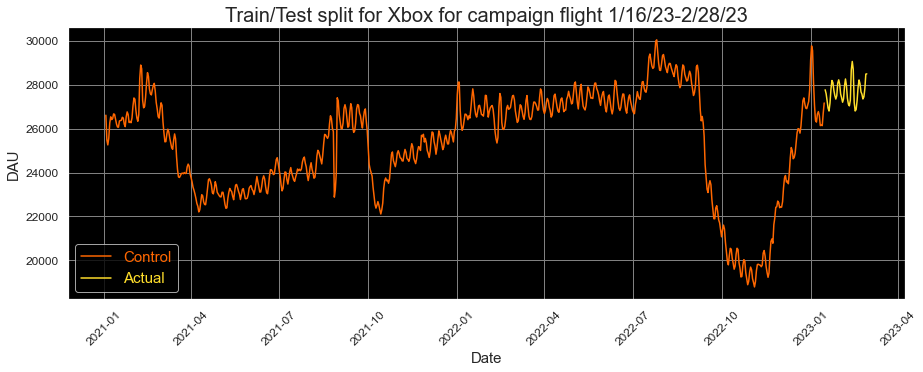

In [208]:
xbox['mov_avg'] = xbox['Users'].rolling(3).mean()

xbox_train =xbox[xbox.index < pd.to_datetime("2023-01-16", format='%Y-%m-%d')]
xbox_test = xbox[xbox.index >= pd.to_datetime("2023-01-16", format='%Y-%m-%d')]

plt.subplots(figsize=(15,5))
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'gray'
plt.plot(xbox_train.index, xbox_train['mov_avg'], color = "#ff6700", label = 'Control')
plt.plot(xbox_test.index, xbox_test['mov_avg'], color = "#ffde2b", label = 'Actual')
plt.ylabel('DAU', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Train/Test split for Xbox for campaign flight 1/16/23-2/28/23", fontsize = 20)
plt.legend(fontsize=15, labelcolor='linecolor')

C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


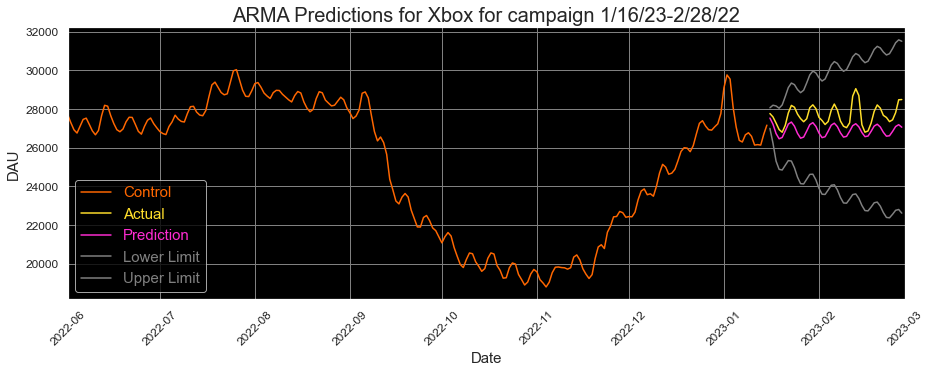

In [164]:
# Autoregressive Moving Average (ARMA)
xbox_ARMAmodel = SARIMAX(xbox_train['mov_avg'], order = (3, 0, 6))
xbox_ARMAmodel = xbox_ARMAmodel.fit(smoothing_level=.2, smoothing_slope=.3)

xbox_arma_y_pred = xbox_ARMAmodel.get_forecast(steps=44) # test data has 44 datapoints
xbox_arma_y_pred_df = xbox_arma_y_pred.conf_int(alpha = 0.05) 
xbox_arma_y_pred_df["Predictions"] = xbox_ARMAmodel.predict(start = xbox_arma_y_pred_df.index[0], end = xbox_arma_y_pred_df.index[-1])

plt.subplots(figsize=(15,5))
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'gray'
plt.ylabel('DAU', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.plot(xbox_train.index, xbox_train['mov_avg'], color = "#ff6700", label = 'Control')
plt.plot(xbox_test.index, xbox_test['mov_avg'], color = "#ffde2b", label = 'Actual')
plt.plot(xbox_arma_y_pred_df["Predictions"], color='#ff2cd2', label = 'Prediction')
plt.plot(xbox_arma_y_pred_df["lower mov_avg"], color='gray', label = 'Lower Limit')
plt.plot(xbox_arma_y_pred_df["upper mov_avg"], color='gray', label = 'Upper Limit')

plt.title("ARMA Predictions for Xbox for campaign 1/16/23-2/28/22", fontsize = 20)
plt.xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2023-03-01'))
plt.legend(fontsize=15, labelcolor='linecolor')

In [158]:
xbox_arma_y_pred_df.to_csv('C:\\Users\\uremekn\\Documents\\Analyses\\BIS 4559 - UA Xbox Comcast - Paid Media Effectiveness\\MAU\\xbox_dau_pred_20230116_20230228.csv')

# Comcast Data Preparation

# Comcast Forecasting
### Campaign Flight: 12/14/22 - 12/28/22

In [209]:
# data prep
comcast = df[df['Device'] == 'COMCASTX1'].sort_values(by=['Date'], ascending=True)
comcast = comcast[(comcast['Date'] < '2022-12-29')]
comcast.index = pd.to_datetime(comcast['Date'], format='%Y-%m-%d')
del comcast['Date']
del comcast['Device']

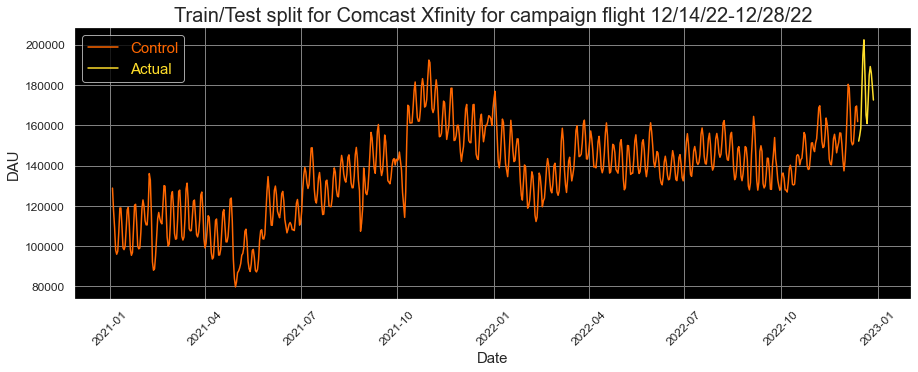

In [210]:
comcast['mov_avg'] = comcast['Users'].rolling(3).mean()

comcast_train =comcast[comcast.index < pd.to_datetime("2022-12-14", format='%Y-%m-%d')]
comcast_test = comcast[comcast.index >= pd.to_datetime("2022-12-14", format='%Y-%m-%d')]

plt.subplots(figsize=(15,5))
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'gray'
plt.plot(comcast_train.index, comcast_train['mov_avg'], color = "#ff6700", label = 'Control')
plt.plot(comcast_test.index, comcast_test['mov_avg'], color = "#ffde2b", label = 'Actual')
plt.ylabel('DAU', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Train/Test split for Comcast Xfinity for campaign flight 12/14/22-12/28/22", fontsize = 20)
plt.legend(fontsize=15, labelcolor='linecolor')

C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


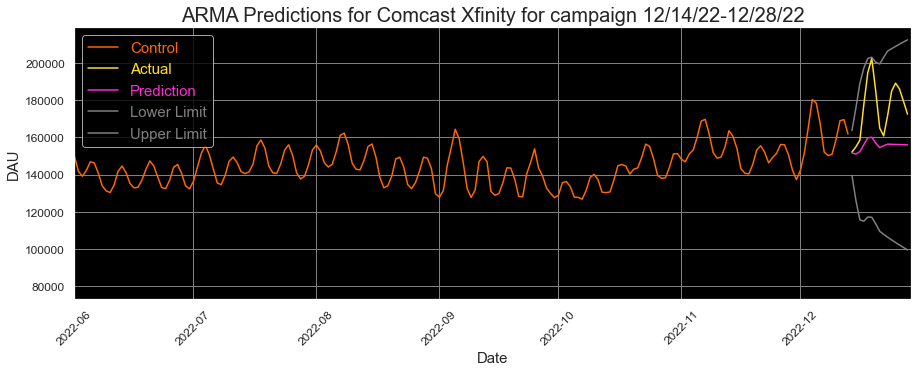

In [211]:
# Autoregressive Moving Average (ARMA)
comcast_ARMAmodel = SARIMAX(comcast_train['mov_avg'], order = (1, 0, 10))
comcast_ARMAmodel = comcast_ARMAmodel.fit(smoothing_level=.2, smoothing_slope=.3)

comcast_arma_y_pred = comcast_ARMAmodel.get_forecast(steps=15) # test data has 169 datapoints
comcast_arma_y_pred_df = comcast_arma_y_pred.conf_int(alpha = 0.05) 
comcast_arma_y_pred_df["Predictions"] = comcast_ARMAmodel.predict(start = comcast_arma_y_pred_df.index[0], end = comcast_arma_y_pred_df.index[-1])

plt.subplots(figsize=(15,5))
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'gray'
plt.ylabel('DAU', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.plot(comcast_train.index, comcast_train['mov_avg'], color = "#ff6700", label = 'Control')
plt.plot(comcast_test.index, comcast_test['mov_avg'], color = "#ffde2b", label = 'Actual')
plt.plot(comcast_arma_y_pred_df["Predictions"], color='#ff2cd2', label = 'Prediction')
plt.plot(comcast_arma_y_pred_df["lower mov_avg"], color='gray', label = 'Lower Limit')
plt.plot(comcast_arma_y_pred_df["upper mov_avg"], color='gray', label = 'Upper Limit')

plt.title("ARMA Predictions for Comcast Xfinity for campaign 12/14/22-12/28/22", fontsize = 20)
plt.xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2022-12-29'))
plt.legend(fontsize=15, labelcolor='linecolor')

In [203]:
comcast_arma_y_pred_df.to_csv('C:\\Users\\uremekn\\Documents\\Analyses\\BIS 4559 - UA Xbox Comcast - Paid Media Effectiveness\\MAU\\comcast_dau_pred_20221214_20221228.csv')

# Comcast Forecasting
### Campaign Flight: 2/1/23 - 2/28/23

In [212]:
# data prep
comcast = df[df['Device'] == 'COMCASTX1'].sort_values(by=['Date'], ascending=True)
comcast = comcast[(comcast['Date'] < '2023-03-01')]
comcast.index = pd.to_datetime(comcast['Date'], format='%Y-%m-%d')
del comcast['Date']
del comcast['Device']

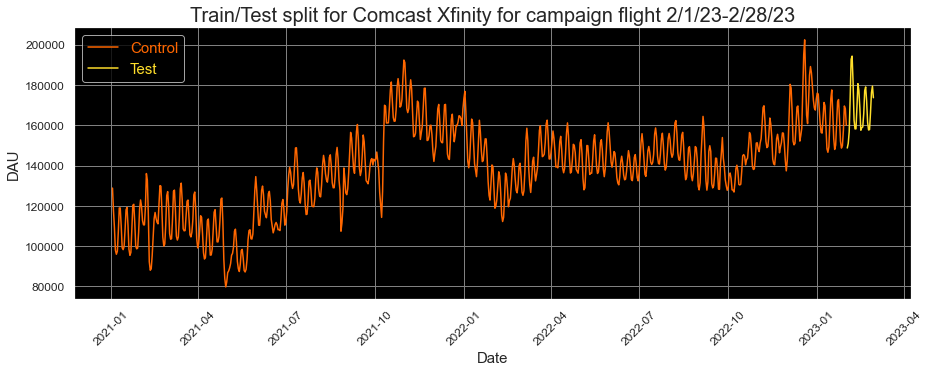

In [213]:
comcast['mov_avg'] = comcast['Users'].rolling(3).mean()

comcast_train =comcast[comcast.index < pd.to_datetime("2023-02-01", format='%Y-%m-%d')]
comcast_test = comcast[comcast.index >= pd.to_datetime("2023-02-01", format='%Y-%m-%d')]

plt.subplots(figsize=(15,5))
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'gray'
plt.plot(comcast_train.index, comcast_train['mov_avg'], color = "#ff6700", label = 'Control')
plt.plot(comcast_test.index, comcast_test['mov_avg'], color = "#ffde2b", label = 'Test')
plt.ylabel('DAU', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Train/Test split for Comcast Xfinity for campaign flight 2/1/23-2/28/23", fontsize = 20)
plt.legend(fontsize=15, labelcolor='linecolor')

In [214]:
len(comcast_test)

28

C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\uremekn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


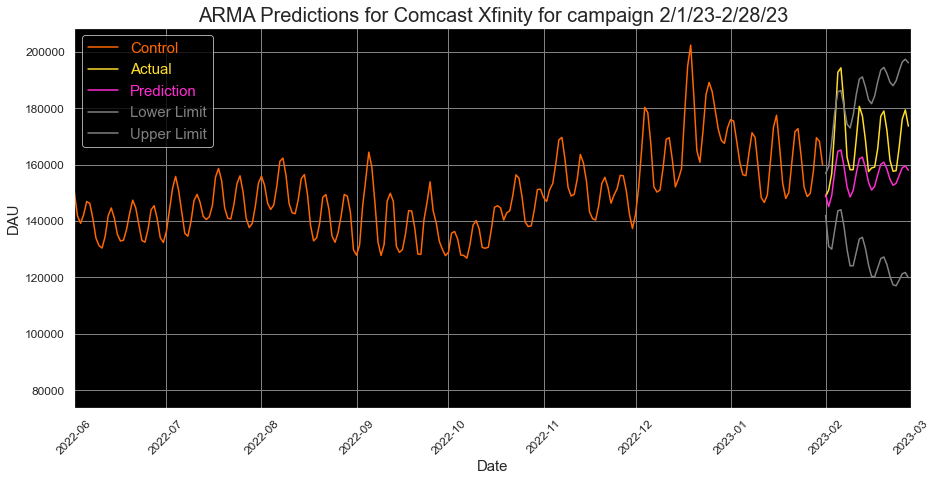

In [225]:
# Autoregressive Moving Average (ARMA)
comcast_ARMAmodel = SARIMAX(comcast_train['mov_avg'], order = (3, 1, 1))
comcast_ARMAmodel = comcast_ARMAmodel.fit(smoothing_level=.2, smoothing_slope=.3)

comcast_arma_y_pred = comcast_ARMAmodel.get_forecast(steps=28) # test data has 28 datapoints
comcast_arma_y_pred_df = comcast_arma_y_pred.conf_int(alpha = 0.05) 
comcast_arma_y_pred_df["Predictions"] = comcast_ARMAmodel.predict(start = comcast_arma_y_pred_df.index[0], end = comcast_arma_y_pred_df.index[-1])

plt.subplots(figsize=(15,7))
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['grid.color'] = 'gray'
plt.ylabel('DAU', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.plot(comcast_train.index, comcast_train['mov_avg'], color = "#ff6700", label = 'Control')
plt.plot(comcast_test.index, comcast_test['mov_avg'], color = "#ffde2b", label = 'Actual')
plt.plot(comcast_arma_y_pred_df["Predictions"], color='#ff2cd2', label = 'Prediction')
plt.plot(comcast_arma_y_pred_df["lower mov_avg"], color='gray', label = 'Lower Limit')
plt.plot(comcast_arma_y_pred_df["upper mov_avg"], color='gray', label = 'Upper Limit')

plt.title("ARMA Predictions for Comcast Xfinity for campaign 2/1/23-2/28/23", fontsize = 20)
plt.xlim(pd.Timestamp('2022-06-01'), pd.Timestamp('2023-03-01'))
plt.legend(fontsize=15, labelcolor='linecolor')

In [227]:
comcast_arma_y_pred_df.to_csv('C:\\Users\\uremekn\\Documents\\Analyses\\BIS 4559 - UA Xbox Comcast - Paid Media Effectiveness\\MAU\\comcast_dau_pred_20230201_20230228.csv')